# Quiz Concepts Practice Lab: Mastering Regression Methods

**Date:** November 12, 2025  
**Module:** 2 - Supervised Machine Learning: Regression  
**Purpose:** Hands-on practice for quiz concepts you got wrong

---

## 📚 What This Lab Covers

This lab addresses the specific concepts from your quiz:

1. **Classical vs. Modern ML Methods** - Understanding the difference
2. **Multiple Linear Regression** - When to use it
3. **OLS Limitations** - Why outliers are problematic
4. **OLS as MSE Minimizer** - How it actually works
5. **Overfitting vs. Underfitting** - High-degree polynomial problems

---

## 🔗 Key Concepts (Glossary References)

**See:** `notes/glossary-module-2.md` for detailed definitions

- **Linear Regression** - Classical statistical method using OLS
- **Polynomial Regression** - Still classical! Uses OLS on transformed features
- **Random Forest** - Modern ML ensemble method
- **Multiple Linear Regression** - 2+ independent variables
- **Ordinary Least Squares (OLS)** - Method minimizing MSE
- **Mean Squared Error (MSE)** - Cost function OLS minimizes
- **Gradient Descent** - Iterative optimization (NOT the same as OLS)
- **Overfitting** - Model memorizes training data including noise
- **Underfitting** - Model too simple to capture patterns
- **Outlier** - Data point far from others, affects OLS heavily

---

## 🎯 Learning Objectives

By the end of this lab, you will:
- ✓ Distinguish classical (OLS-based) from modern ML methods
- ✓ Implement and compare simple vs. multiple linear regression
- ✓ Visualize why OLS is sensitive to outliers
- ✓ Demonstrate that OLS minimizes MSE mathematically
- ✓ Show overfitting with high-degree polynomials
- ✓ Make correct choices for your next quiz attempt!

## 📦 Setup: Run Me First!

Import all necessary libraries and set random seeds for reproducibility.

In [6]:
# Import numerical computation library (see glossary: NumPy)
import numpy as np

# Import data manipulation library (see glossary: Pandas)
import pandas as pd

# Import visualization libraries (see glossary: Matplotlib, Seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn for machine learning models
from sklearn.linear_model import LinearRegression  # Classical OLS-based method
from sklearn.ensemble import RandomForestRegressor  # Modern ML ensemble method
from sklearn.preprocessing import PolynomialFeatures  # For polynomial regression
from sklearn.model_selection import train_test_split  # Split data into train/test
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics

# Set random seed for reproducibility (see glossary: Random State)
np.random.seed(42)  # Ensures same random numbers every time

# Configure matplotlib for better plots
plt.style.use('seaborn-v0_8-darkgrid')  # Use seaborn style for nicer plots
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size
plt.rcParams['font.size'] = 11  # Set default font size

# Print versions for reproducibility
print(f"NumPy version: {np.__version__}")  # Show NumPy version
print(f"Pandas version: {pd.__version__}")  # Show Pandas version
print("✓ Setup complete! Ready to learn.")  # Confirm setup successful

NumPy version: 2.2.0
Pandas version: 2.2.3
✓ Setup complete! Ready to learn.


---

## ❓ Quiz Question 1: Classical vs. Modern ML Methods

**Question:** Which of the following regression methods is a modern machine learning technique?

**Your Answer:** Polynomial regression ❌  
**Correct Answer:** Random forest regression ✅

**Why This Matters:** Understanding the distinction between classical statistical methods (OLS-based) and modern ML methods (algorithmic/ensemble) is crucial for choosing the right tool.

### Classical Methods (Pre-1990s, Statistical)
- Linear Regression
- Polynomial Regression
- Simple Linear Regression
- **Characteristic:** Use OLS (closed-form solution), no hyperparameters

### Modern ML Methods (1990s+, Computer Science)
- Random Forest
- Neural Networks
- Support Vector Machines
- Gradient Boosting
- **Characteristic:** Iterative training, hyperparameters, no closed-form solution

In [7]:
# Create sample dataset for regression (see glossary: Synthetic Data)
np.random.seed(42)  # Set seed for reproducibility
X = np.linspace(0, 10, 50).reshape(-1, 1)  # Create 50 evenly spaced points from 0 to 10
y = 2 * X.flatten() + 1 + np.random.normal(0, 1, 50)  # Linear relationship: y = 2x + 1 + noise

# CLASSICAL METHOD: Linear Regression (uses OLS under the hood)
classical_model = LinearRegression()  # Initialize linear regression model (see glossary: Linear Regression)
classical_model.fit(X, y)  # Train model using OLS formula: θ = (X^T X)^-1 X^T y
y_pred_classical = classical_model.predict(X)  # Make predictions using learned parameters

# MODERN ML METHOD: Random Forest (ensemble of decision trees)
modern_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize with 100 trees (see glossary: Random Forest)
modern_model.fit(X, y)  # Train 100 decision trees iteratively
y_pred_modern = modern_model.predict(X)  # Aggregate predictions from all trees

# Calculate performance metrics (see glossary: MSE, R-squared)
mse_classical = mean_squared_error(y, y_pred_classical)  # Classical MSE
mse_modern = mean_squared_error(y, y_pred_modern)  # Modern MSE
r2_classical = r2_score(y, y_pred_classical)  # Classical R²
r2_modern = r2_score(y, y_pred_modern)  # Modern R²

# Print comparison
print("="*60)
print("CLASSICAL vs. MODERN ML METHODS COMPARISON")
print("="*60)
print(f"\n📊 Linear Regression (Classical/OLS-based):")
print(f"   MSE: {mse_classical:.3f}")
print(f"   R²: {r2_classical:.3f}")
print(f"   Training: Closed-form solution (instant)")
print(f"   Hyperparameters: None")
print(f"\n🌲 Random Forest (Modern ML):")
print(f"   MSE: {mse_modern:.3f}")
print(f"   R²: {r2_modern:.3f}")
print(f"   Training: Iterative (100 trees)")
print(f"   Hyperparameters: n_estimators, max_depth, min_samples_split, etc.")
print("\n✅ Key Takeaway: Random Forest is MODERN ML, not classical!")
print("   Polynomial Regression is still CLASSICAL (uses OLS)!")
print("="*60)

CLASSICAL vs. MODERN ML METHODS COMPARISON

📊 Linear Regression (Classical/OLS-based):
   MSE: 0.825
   R²: 0.975
   Training: Closed-form solution (instant)
   Hyperparameters: None

🌲 Random Forest (Modern ML):
   MSE: 0.164
   R²: 0.995
   Training: Iterative (100 trees)
   Hyperparameters: n_estimators, max_depth, min_samples_split, etc.

✅ Key Takeaway: Random Forest is MODERN ML, not classical!
   Polynomial Regression is still CLASSICAL (uses OLS)!


---

## ❓ Quiz Question 3: OLS Sensitivity to Outliers

**Question:** Why is OLS regression's accuracy for complex data sets limited?

**Your Answer:** Requires extensive tuning ❌  
**Correct Answer:** May inaccurately weigh outliers, resulting in skewed outputs ✅

**Why This Matters:** OLS minimizes **squared** errors, so large errors (outliers) get amplified. A single outlier can dramatically skew the best-fit line.

### Demonstration: How Outliers Affect OLS

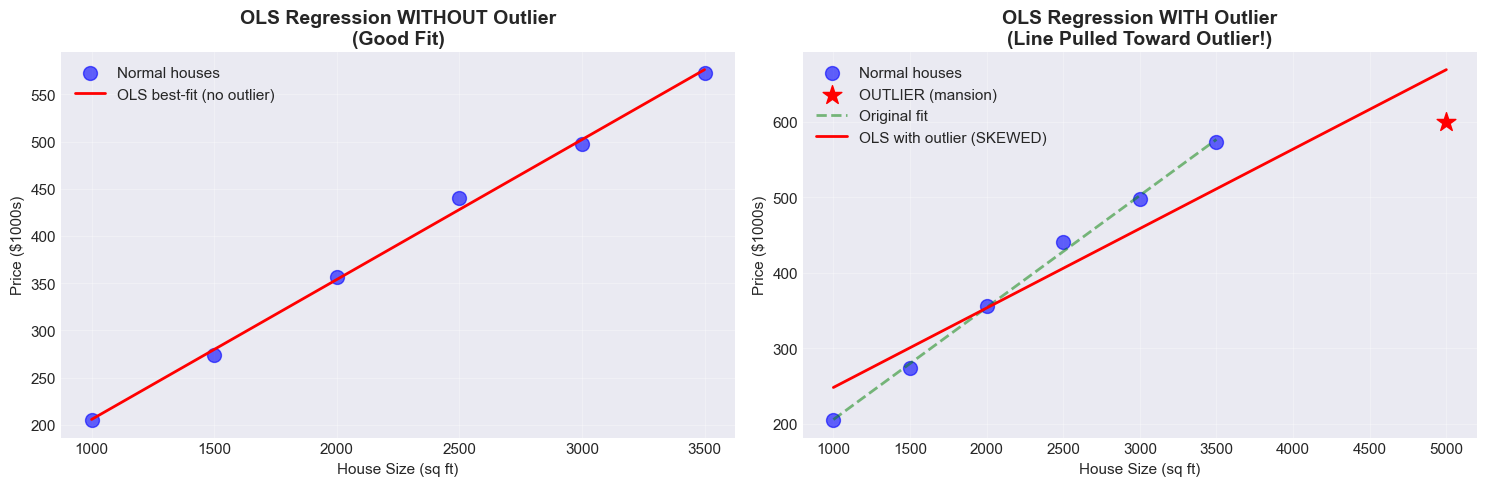


OLS OUTLIER SENSITIVITY ANALYSIS

📊 Model WITHOUT outlier:
   Slope: $0.15 per sq ft
   Intercept: $57.38k
   Prediction for 2000 sq ft: $353.87k

📊 Model WITH outlier:
   Slope: $0.11 per sq ft  ← CHANGED!
   Intercept: $142.97k  ← CHANGED!
   Prediction for 2000 sq ft: $353.22k  ← OVERESTIMATED!

⚠️  Impact of ONE outlier:
   Single outlier changed prediction by $-0.65k (-0.2%)

❌ Why OLS is limited:
   - Squared errors amplify outliers: Error² for outlier = 4706.1
   - Normal house error² = 0.4
   - Outlier contributes 10867.1× more to cost!
   - OLS bends line to minimize this huge squared error

✅ Key Takeaway: OLS DOES NOT require tuning (that's its strength!)
   But OLS IS sensitive to outliers (that's its weakness!)


In [8]:
# Create clean house price dataset (see glossary: Dataset)
np.random.seed(42)  # Set seed for reproducibility
sizes_clean = np.array([1000, 1500, 2000, 2500, 3000, 3500]).reshape(-1, 1)  # House sizes in sq ft
prices_clean = 50 + 0.15 * sizes_clean.flatten() + np.random.normal(0, 10, 6)  # Prices: $50k + $150/sqft + noise

# Create dataset WITH outlier (see glossary: Outlier)
sizes_outlier = np.append(sizes_clean, [[5000]], axis=0)  # Add mansion (5000 sq ft)
prices_outlier = np.append(prices_clean, [600])  # Add outlier price ($600k - way too high!)

# Fit OLS without outlier (see glossary: OLS)
model_clean = LinearRegression()  # Initialize model
model_clean.fit(sizes_clean, prices_clean)  # Train on clean data using OLS: θ = (X^T X)^-1 X^T y
pred_clean = model_clean.predict(sizes_clean)  # Predict with clean model

# Fit OLS WITH outlier
model_outlier = LinearRegression()  # Initialize model
model_outlier.fit(sizes_outlier, prices_outlier)  # Train on data with outlier
pred_outlier_all = model_outlier.predict(sizes_outlier)  # Predict with outlier-affected model
pred_outlier_clean = model_outlier.predict(sizes_clean)  # Predict clean sizes with outlier-affected model

# Calculate error contributions (see glossary: MSE, Sum of Squared Residuals)
error_clean_point = (prices_clean[0] - pred_clean[0])**2  # Squared error for normal house
error_outlier_point = (prices_outlier[-1] - pred_outlier_all[-1])**2  # Squared error for outlier

# Visualize the impact
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  # Create two side-by-side plots

# Plot WITHOUT outlier
ax1.scatter(sizes_clean, prices_clean, c='blue', s=100, alpha=0.6, label='Normal houses')  # Plot data points
ax1.plot(sizes_clean, pred_clean, 'r-', linewidth=2, label='OLS best-fit (no outlier)')  # Plot regression line
ax1.set_xlabel('House Size (sq ft)')  # Label x-axis
ax1.set_ylabel('Price ($1000s)')  # Label y-axis
ax1.set_title('OLS Regression WITHOUT Outlier\n(Good Fit)', fontsize=14, fontweight='bold')  # Add title
ax1.legend()  # Show legend
ax1.grid(True, alpha=0.3)  # Add grid

# Plot WITH outlier
ax2.scatter(sizes_clean, prices_clean, c='blue', s=100, alpha=0.6, label='Normal houses')  # Plot normal houses
ax2.scatter([5000], [600], c='red', s=200, marker='*', label='OUTLIER (mansion)', zorder=5)  # Plot outlier
ax2.plot(sizes_clean, pred_clean, 'g--', linewidth=2, alpha=0.5, label='Original fit')  # Show original fit
ax2.plot(sizes_outlier, pred_outlier_all, 'r-', linewidth=2, label='OLS with outlier (SKEWED)')  # Plot skewed fit
ax2.set_xlabel('House Size (sq ft)')  # Label x-axis
ax2.set_ylabel('Price ($1000s)')  # Label y-axis
ax2.set_title('OLS Regression WITH Outlier\n(Line Pulled Toward Outlier!)', fontsize=14, fontweight='bold')  # Add title
ax2.legend()  # Show legend
ax2.grid(True, alpha=0.3)  # Add grid

plt.tight_layout()  # Adjust spacing
plt.show()  # Display plots

# Print analysis
print("\n" + "="*70)
print("OLS OUTLIER SENSITIVITY ANALYSIS")
print("="*70)
print(f"\n📊 Model WITHOUT outlier:")
print(f"   Slope: ${model_clean.coef_[0]:.2f} per sq ft")
print(f"   Intercept: ${model_clean.intercept_:.2f}k")
print(f"   Prediction for 2000 sq ft: ${model_clean.predict([[2000]])[0]:.2f}k")
print(f"\n📊 Model WITH outlier:")
print(f"   Slope: ${model_outlier.coef_[0]:.2f} per sq ft  ← CHANGED!")
print(f"   Intercept: ${model_outlier.intercept_:.2f}k  ← CHANGED!")
print(f"   Prediction for 2000 sq ft: ${model_outlier.predict([[2000]])[0]:.2f}k  ← OVERESTIMATED!")
print(f"\n⚠️  Impact of ONE outlier:")
difference = model_outlier.predict([[2000]])[0] - model_clean.predict([[2000]])[0]
print(f"   Single outlier changed prediction by ${difference:.2f}k ({(difference/model_clean.predict([[2000]])[0]*100):.1f}%)")
print(f"\n❌ Why OLS is limited:")
print(f"   - Squared errors amplify outliers: Error² for outlier = {error_outlier_point:.1f}")
print(f"   - Normal house error² = {error_clean_point:.1f}")
print(f"   - Outlier contributes {(error_outlier_point/error_clean_point):.1f}× more to cost!")
print(f"   - OLS bends line to minimize this huge squared error")
print(f"\n✅ Key Takeaway: OLS DOES NOT require tuning (that's its strength!)")
print(f"   But OLS IS sensitive to outliers (that's its weakness!)")
print("="*70)

---

## ❓ Quiz Question 4: OLS Minimizes MSE

**Question:** What model estimates coefficients by minimizing MSE?

**Your Answer:** Gradient descent ❌  
**Correct Answer:** Ordinary least squares ✅

**Why This Matters:** OLS **IS** the method that minimizes MSE using a closed-form formula. Gradient descent is an *optimization approach* (iterative) used when closed-form solutions don't exist.

### Mathematical Proof: OLS Minimizes MSE

In [9]:
# Demonstrate that OLS formula DIRECTLY minimizes MSE (see glossary: OLS, MSE)
np.random.seed(42)  # Set seed
X_simple = np.array([[1], [2], [3], [4], [5]])  # Simple X values
y_simple = np.array([2.1, 3.9, 6.2, 7.9, 10.1])  # Simple y values (roughly y = 2x)

# METHOD 1: Use sklearn LinearRegression (which uses OLS under the hood)
sklearn_model = LinearRegression()  # Initialize model
sklearn_model.fit(X_simple, y_simple)  # Train using OLS formula
theta_sklearn = [sklearn_model.intercept_, sklearn_model.coef_[0]]  # Extract parameters

# METHOD 2: Calculate OLS formula manually (see glossary: OLS Formula)
# OLS formula: θ = (X^T X)^(-1) X^T y
X_with_intercept = np.c_[np.ones(X_simple.shape[0]), X_simple]  # Add column of 1's for intercept: [1, x]
XtX = X_with_intercept.T @ X_with_intercept  # Calculate X^T X (matrix multiplication)
XtX_inv = np.linalg.inv(XtX)  # Calculate (X^T X)^(-1) (matrix inversion)
Xty = X_with_intercept.T @ y_simple  # Calculate X^T y (matrix multiplication)
theta_manual = XtX_inv @ Xty  # Final OLS formula: θ = (X^T X)^(-1) X^T y

# Calculate MSE for both methods (see glossary: MSE)
y_pred_sklearn = sklearn_model.predict(X_simple)  # Predictions from sklearn
y_pred_manual = X_with_intercept @ theta_manual  # Predictions from manual OLS
mse_sklearn = np.mean((y_simple - y_pred_sklearn)**2)  # MSE from sklearn
mse_manual = np.mean((y_simple - y_pred_manual)**2)  # MSE from manual OLS

# Try some random parameters to show OLS gives minimum MSE
random_mses = []  # List to store MSE values for random parameters
for i in range(100):  # Try 100 random parameter combinations
    random_intercept = np.random.uniform(-5, 5)  # Random intercept
    random_slope = np.random.uniform(0, 5)  # Random slope
    y_pred_random = random_intercept + random_slope * X_simple.flatten()  # Random predictions
    mse_random = np.mean((y_simple - y_pred_random)**2)  # MSE for random parameters
    random_mses.append(mse_random)  # Store MSE

# Print results
print("="*70)
print("PROOF: OLS MINIMIZES MSE")
print("="*70)
print(f"\n📐 Sklearn LinearRegression (uses OLS internally):")
print(f"   θ₀ (intercept) = {theta_sklearn[0]:.4f}")
print(f"   θ₁ (slope) = {theta_sklearn[1]:.4f}")
print(f"   MSE = {mse_sklearn:.6f}")
print(f"\n📐 Manual OLS Formula: θ = (X^T X)^(-1) X^T y")
print(f"   θ₀ (intercept) = {theta_manual[0]:.4f}")
print(f"   θ₁ (slope) = {theta_manual[1]:.4f}")
print(f"   MSE = {mse_manual:.6f}")
print(f"\n✅ Both methods give IDENTICAL results!")
print(f"   Difference: {abs(mse_sklearn - mse_manual):.10f} (essentially zero)")
print(f"\n📊 Comparison with 100 random parameter choices:")
print(f"   OLS MSE: {mse_sklearn:.6f}")
print(f"   Minimum random MSE: {min(random_mses):.6f}")
print(f"   Average random MSE: {np.mean(random_mses):.6f}")
print(f"   Maximum random MSE: {max(random_mses):.6f}")
print(f"\n✅ Key Takeaway: OLS finds the MINIMUM MSE!")
print(f"   - OLS is THE METHOD that minimizes MSE")
print(f"   - Gradient descent is an OPTIMIZATION APPROACH (iterative)")
print(f"   - OLS uses closed-form formula (one calculation, exact)")
print(f"   - Gradient descent uses iterations (multiple calculations, approximate)")
print("="*70)

PROOF: OLS MINIMIZES MSE

📐 Sklearn LinearRegression (uses OLS internally):
   θ₀ (intercept) = 0.0400
   θ₁ (slope) = 2.0000
   MSE = 0.014400

📐 Manual OLS Formula: θ = (X^T X)^(-1) X^T y
   θ₀ (intercept) = 0.0400
   θ₁ (slope) = 2.0000
   MSE = 0.014400

✅ Both methods give IDENTICAL results!
   Difference: 0.0000000000 (essentially zero)

📊 Comparison with 100 random parameter choices:
   OLS MSE: 0.014400
   Minimum random MSE: 0.412858
   Average random MSE: 31.985830
   Maximum random MSE: 150.964248

✅ Key Takeaway: OLS finds the MINIMUM MSE!
   - OLS is THE METHOD that minimizes MSE
   - Gradient descent is an OPTIMIZATION APPROACH (iterative)
   - OLS uses closed-form formula (one calculation, exact)
   - Gradient descent uses iterations (multiple calculations, approximate)


---

## ❓ Quiz Question 5: Overfitting - Memorizing Noise

**Question:** What issue occurs when high-degree polynomial memorizes random noise?

**Your Answer:** Underfitting ❌  
**Correct Answer:** Overfitting ✅

**Why This Matters:** 
- **Overfitting** = Model TOO COMPLEX, MEMORIZES training data (including noise)
- **Underfitting** = Model TOO SIMPLE, MISSES the pattern

**Key Word:** "MEMORIZES" = OVERFITTING!

### Visual Demonstration: Underfitting vs. Good Fit vs. Overfitting

C:\Users\rhode\AppData\Local\Temp\ipykernel_10552\772723636.py:90: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()  # Adjust spacing
C:\Users\rhode\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


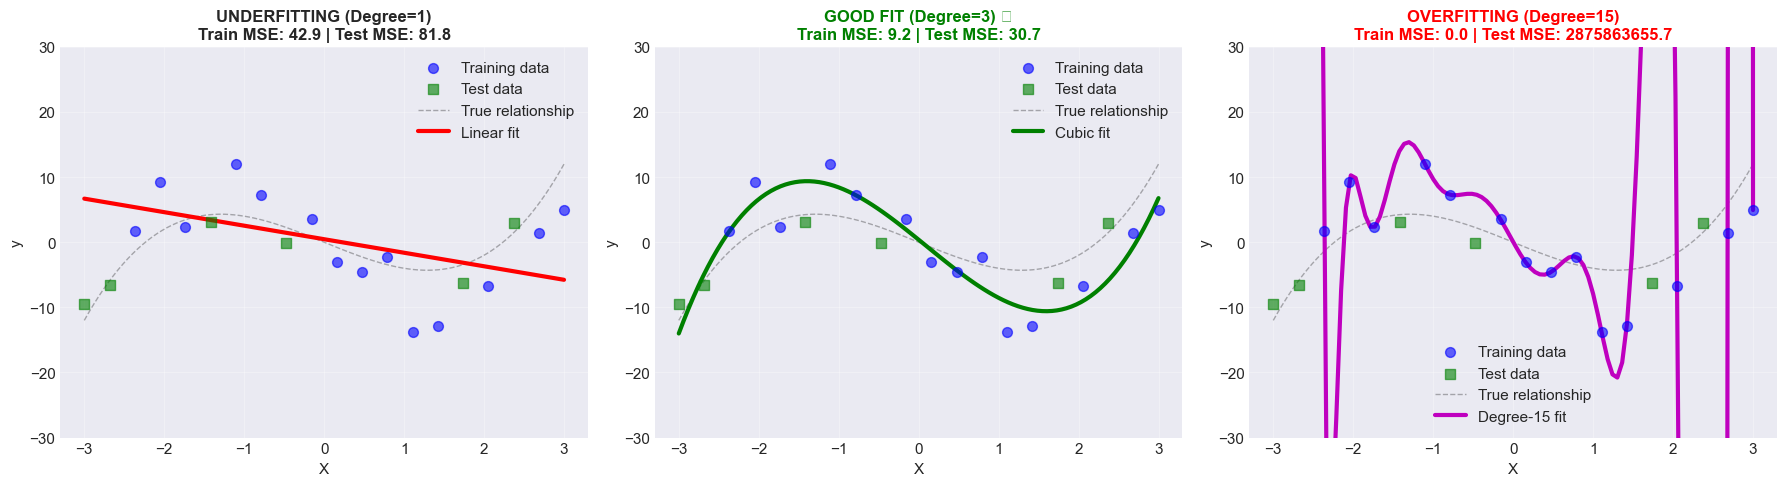


OVERFITTING vs. UNDERFITTING ANALYSIS

❌ UNDERFITTING (Degree=1 - Linear):
   Model: TOO SIMPLE
   Training MSE: 42.86 (HIGH - can't fit training data well)
   Test MSE: 81.78 (HIGH - can't generalize either)
   Problem: Misses the cubic pattern, just draws straight line
   Symptom: High bias (systematic errors)

✅ GOOD FIT (Degree=3 - Cubic):
   Model: JUST RIGHT
   Training MSE: 9.22 (LOW - fits training data well)
   Test MSE: 30.70 (LOW - generalizes well)
   Solution: Matches the true cubic relationship!
   Balance: Low bias, low variance

❌ OVERFITTING (Degree=15 - Very High Polynomial):
   Model: TOO COMPLEX
   Training MSE: 0.00 (VERY LOW - memorizes training data!)
   Test MSE: 2875863655.69 (VERY HIGH - fails on new data!)
   Problem: Wiggly line passes through every training point, including NOISE
   Symptom: High variance (predictions change wildly with small data changes)

🎯 Quiz Question Keywords:
   - 'HIGH-DEGREE polynomial' → Degree=15 (overfitting candidate)
   - 'ME

In [5]:
# Create dataset with cubic relationship + noise (see glossary: Synthetic Data, Noise)
np.random.seed(42)  # Set seed
X_poly = np.linspace(-3, 3, 20).reshape(-1, 1)  # 20 points from -3 to 3
y_true = X_poly.flatten()**3 - 5*X_poly.flatten()  # True cubic relationship
noise = np.random.normal(0, 5, 20)  # Random noise (see glossary: Noise)
y_poly = y_true + noise  # Observed data = true relationship + noise

# Split into train and test (see glossary: Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.3, random_state=42)

# Generate points for smooth plotting
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)  # 100 points for smooth curves
y_plot_true = X_plot.flatten()**3 - 5*X_plot.flatten()  # True relationship for reference

# UNDERFITTING: Degree-1 (Linear) - TOO SIMPLE (see glossary: Underfitting)
poly_underfit = PolynomialFeatures(degree=1)  # Transform features to degree-1 (just X)
X_train_underfit = poly_underfit.fit_transform(X_train)  # Transform training data
X_test_underfit = poly_underfit.transform(X_test)  # Transform test data
X_plot_underfit = poly_underfit.transform(X_plot)  # Transform plotting data
model_underfit = LinearRegression()  # Initialize linear model
model_underfit.fit(X_train_underfit, y_train)  # Train on degree-1 features
y_pred_underfit = model_underfit.predict(X_plot_underfit)  # Predict for plotting
train_mse_underfit = mean_squared_error(y_train, model_underfit.predict(X_train_underfit))  # Training MSE
test_mse_underfit = mean_squared_error(y_test, model_underfit.predict(X_test_underfit))  # Test MSE

# GOOD FIT: Degree-3 (Cubic) - JUST RIGHT (see glossary: Polynomial Regression)
poly_good = PolynomialFeatures(degree=3)  # Transform to degree-3 (X, X², X³)
X_train_good = poly_good.fit_transform(X_train)  # Transform training data
X_test_good = poly_good.transform(X_test)  # Transform test data
X_plot_good = poly_good.transform(X_plot)  # Transform plotting data
model_good = LinearRegression()  # Initialize model
model_good.fit(X_train_good, y_train)  # Train on degree-3 features
y_pred_good = model_good.predict(X_plot_good)  # Predict for plotting
train_mse_good = mean_squared_error(y_train, model_good.predict(X_train_good))  # Training MSE
test_mse_good = mean_squared_error(y_test, model_good.predict(X_test_good))  # Test MSE

# OVERFITTING: Degree-15 (Very High) - TOO COMPLEX (see glossary: Overfitting)
poly_overfit = PolynomialFeatures(degree=15)  # Transform to degree-15 (X, X², ..., X¹⁵)
X_train_overfit = poly_overfit.fit_transform(X_train)  # Transform training data
X_test_overfit = poly_overfit.transform(X_test)  # Transform test data
X_plot_overfit = poly_overfit.transform(X_plot)  # Transform plotting data
model_overfit = LinearRegression()  # Initialize model
model_overfit.fit(X_train_overfit, y_train)  # Train on degree-15 features (MEMORIZES!)
y_pred_overfit = model_overfit.predict(X_plot_overfit)  # Predict for plotting
train_mse_overfit = mean_squared_error(y_train, model_overfit.predict(X_train_overfit))  # Training MSE (will be very low!)
test_mse_overfit = mean_squared_error(y_test, model_overfit.predict(X_test_overfit))  # Test MSE (will be high!)

# Create visualization showing all three cases
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Create three side-by-side plots

# Plot 1: UNDERFITTING
axes[0].scatter(X_train, y_train, c='blue', s=50, alpha=0.6, label='Training data', zorder=3)  # Training points
axes[0].scatter(X_test, y_test, c='green', s=50, alpha=0.6, marker='s', label='Test data', zorder=3)  # Test points
axes[0].plot(X_plot, y_plot_true, 'k--', alpha=0.3, label='True relationship', linewidth=1)  # True curve
axes[0].plot(X_plot, y_pred_underfit, 'r-', linewidth=3, label='Linear fit')  # Model prediction
axes[0].set_title(f'UNDERFITTING (Degree=1)\nTrain MSE: {train_mse_underfit:.1f} | Test MSE: {test_mse_underfit:.1f}', 
                  fontsize=12, fontweight='bold')  # Title with MSE
axes[0].set_xlabel('X')  # X label
axes[0].set_ylabel('y')  # Y label
axes[0].legend()  # Legend
axes[0].grid(True, alpha=0.3)  # Grid
axes[0].set_ylim(-30, 30)  # Set y-axis limits

# Plot 2: GOOD FIT
axes[1].scatter(X_train, y_train, c='blue', s=50, alpha=0.6, label='Training data', zorder=3)  # Training points
axes[1].scatter(X_test, y_test, c='green', s=50, alpha=0.6, marker='s', label='Test data', zorder=3)  # Test points
axes[1].plot(X_plot, y_plot_true, 'k--', alpha=0.3, label='True relationship', linewidth=1)  # True curve
axes[1].plot(X_plot, y_pred_good, 'g-', linewidth=3, label='Cubic fit')  # Model prediction
axes[1].set_title(f'GOOD FIT (Degree=3) ✓\nTrain MSE: {train_mse_good:.1f} | Test MSE: {test_mse_good:.1f}', 
                  fontsize=12, fontweight='bold', color='green')  # Title with MSE
axes[1].set_xlabel('X')  # X label
axes[1].set_ylabel('y')  # Y label
axes[1].legend()  # Legend
axes[1].grid(True, alpha=0.3)  # Grid
axes[1].set_ylim(-30, 30)  # Set y-axis limits

# Plot 3: OVERFITTING
axes[2].scatter(X_train, y_train, c='blue', s=50, alpha=0.6, label='Training data', zorder=3)  # Training points
axes[2].scatter(X_test, y_test, c='green', s=50, alpha=0.6, marker='s', label='Test data', zorder=3)  # Test points
axes[2].plot(X_plot, y_plot_true, 'k--', alpha=0.3, label='True relationship', linewidth=1)  # True curve
axes[2].plot(X_plot, y_pred_overfit, 'm-', linewidth=3, label='Degree-15 fit')  # Model prediction (wiggly!)
axes[2].set_title(f'OVERFITTING (Degree=15)\nTrain MSE: {train_mse_overfit:.1f} | Test MSE: {test_mse_overfit:.1f}', 
                  fontsize=12, fontweight='bold', color='red')  # Title with MSE
axes[2].set_xlabel('X')  # X label
axes[2].set_ylabel('y')  # Y label
axes[2].legend()  # Legend
axes[2].grid(True, alpha=0.3)  # Grid
axes[2].set_ylim(-30, 30)  # Set y-axis limits

plt.tight_layout()  # Adjust spacing
plt.show()  # Display

# Print comprehensive analysis
print("\n" + "="*80)
print("OVERFITTING vs. UNDERFITTING ANALYSIS")
print("="*80)
print(f"\n❌ UNDERFITTING (Degree=1 - Linear):")
print(f"   Model: TOO SIMPLE")
print(f"   Training MSE: {train_mse_underfit:.2f} (HIGH - can't fit training data well)")
print(f"   Test MSE: {test_mse_underfit:.2f} (HIGH - can't generalize either)")
print(f"   Problem: Misses the cubic pattern, just draws straight line")
print(f"   Symptom: High bias (systematic errors)")
print(f"\n✅ GOOD FIT (Degree=3 - Cubic):")
print(f"   Model: JUST RIGHT")
print(f"   Training MSE: {train_mse_good:.2f} (LOW - fits training data well)")
print(f"   Test MSE: {test_mse_good:.2f} (LOW - generalizes well)")
print(f"   Solution: Matches the true cubic relationship!")
print(f"   Balance: Low bias, low variance")
print(f"\n❌ OVERFITTING (Degree=15 - Very High Polynomial):")
print(f"   Model: TOO COMPLEX")
print(f"   Training MSE: {train_mse_overfit:.2f} (VERY LOW - memorizes training data!)")
print(f"   Test MSE: {test_mse_overfit:.2f} (VERY HIGH - fails on new data!)")
print(f"   Problem: Wiggly line passes through every training point, including NOISE")
print(f"   Symptom: High variance (predictions change wildly with small data changes)")
print(f"\n🎯 Quiz Question Keywords:")
print(f"   - 'HIGH-DEGREE polynomial' → Degree=15 (overfitting candidate)")
print(f"   - 'MEMORIZES random noise' → OVERFITTING!")
print(f"   - NOT underfitting (that's when model is too simple)")
print(f"\n📊 Performance Ratio:")
print(f"   Underfitting: Test/Train = {test_mse_underfit/train_mse_underfit:.2f} (both bad)")
print(f"   Good Fit: Test/Train = {test_mse_good/train_mse_good:.2f} (close to 1.0)")
print(f"   Overfitting: Test/Train = {test_mse_overfit/train_mse_overfit:.2f} (test >>> train)")
print(f"\n✅ Key Takeaway: Degree-15 polynomial OVERFITS by memorizing noise!")
print("="*80)

---

## 🎯 Quiz Answer Quick Reference

### For Your Next Attempt:

| Question | Correct Answer | Key Concept |
|----------|----------------|-------------|
| **Q1: Modern ML method?** | **Random Forest** | Classical = OLS-based (Linear, Polynomial); Modern = algorithmic (Random Forest, Neural Nets) |
| **Q3: OLS limitation?** | **Sensitive to outliers** | Squared errors amplify outliers; OLS does NOT need tuning (that's its strength!) |
| **Q4: Minimizes MSE?** | **OLS** | OLS is THE METHOD; Gradient Descent is an optimization approach |
| **Q5: Memorizes noise?** | **Overfitting** | Memorizing = OVERFITTING (too complex); Underfitting = too simple |

---

## ✅ What You Should Remember

### Classical vs. Modern
- **If it uses OLS → Classical** (Linear, Polynomial, Simple Linear)
- **If it's algorithmic/ensemble → Modern** (Random Forest, Neural Networks, SVM)

### OLS Characteristics
- **✓ Strength:** No tuning, fast, exact solution
- **✗ Weakness:** Sensitive to outliers (squared errors)

### OLS vs. Gradient Descent
- **OLS:** Method/Formula - θ = (X^T X)^(-1) X^T y (one calculation)
- **Gradient Descent:** Optimization approach (iterative updates)

### Overfitting vs. Underfitting
- **Underfitting:** Model too simple, high training error, high test error
- **Overfitting:** Model too complex, memorizes training data, very low training error, very high test error

**Decision Tree:**
```
Does model fit training data well?
├─ NO → UNDERFITTING (increase complexity)
└─ YES → Does it fit test data well?
           ├─ YES → GOOD FIT! ✓
           └─ NO → OVERFITTING (decrease complexity / add regularization)
```

---

## 📝 Practice Exercises

Try these to cement your understanding:

### Exercise 1: Classify the Methods

For each method below, classify as **CLASSICAL** or **MODERN ML**:

1. Simple Linear Regression - ?
2. Support Vector Machine - ?
3. Polynomial Regression (degree 5) - ?
4. Gradient Boosting Machine - ?
5. Multiple Linear Regression - ?
6. Neural Network - ?
7. k-Nearest Neighbors - ?

<details>
<summary>Click for Answers</summary>

1. Simple Linear Regression - **CLASSICAL** (uses OLS)
2. Support Vector Machine - **MODERN ML** (iterative, hyperparameters)
3. Polynomial Regression (degree 5) - **CLASSICAL** (still uses OLS!)
4. Gradient Boosting Machine - **MODERN ML** (ensemble, iterative)
5. Multiple Linear Regression - **CLASSICAL** (uses OLS)
6. Neural Network - **MODERN ML** (backpropagation, many hyperparameters)
7. k-Nearest Neighbors - **MODERN ML** (algorithmic, hyperparameter k)

**Key:** If it mentions "linear" or "polynomial" → probably classical!
</details>

---

### Exercise 2: Identify the Problem

For each scenario, identify **UNDERFITTING**, **GOOD FIT**, or **OVERFITTING**:

1. Training R² = 0.45, Test R² = 0.42 - ?
2. Training R² = 0.99, Test R² = 0.25 - ?
3. Training R² = 0.88, Test R² = 0.85 - ?
4. Degree-20 polynomial on 15 data points - ?
5. Linear model on exponential data - ?

<details>
<summary>Click for Answers</summary>

1. Training R² = 0.45, Test R² = 0.42 - **UNDERFITTING** (both low)
2. Training R² = 0.99, Test R² = 0.25 - **OVERFITTING** (train high, test low)
3. Training R² = 0.88, Test R² = 0.85 - **GOOD FIT** (both high, close together)
4. Degree-20 polynomial on 15 data points - **OVERFITTING** (too complex for data size)
5. Linear model on exponential data - **UNDERFITTING** (too simple for pattern)
</details>

---

### Exercise 3: OLS True or False

1. OLS requires extensive hyperparameter tuning - ?
2. OLS is sensitive to outliers - ?
3. OLS uses gradient descent - ?
4. OLS minimizes Mean Squared Error - ?
5. Polynomial regression uses gradient descent - ?

<details>
<summary>Click for Answers</summary>

1. **FALSE** - OLS requires NO tuning (closed-form solution)
2. **TRUE** - Squared errors amplify outliers
3. **FALSE** - OLS uses closed-form formula, not gradient descent
4. **TRUE** - OLS directly minimizes MSE via calculus
5. **FALSE** - Polynomial regression uses OLS (closed-form), not gradient descent
</details>

---

## 🎓 Final Tips for Quiz Success

### Before Answering, Ask Yourself:

**For method classification:**
- Does it use OLS? → Classical
- Does it require iterative training? → Modern ML

**For OLS questions:**
- Remember: OLS = METHOD that minimizes MSE
- Gradient descent = OPTIMIZATION APPROACH (different thing!)
- Strength = no tuning; Weakness = outlier sensitivity

**For overfitting/underfitting:**
- Look for keywords: "memorize", "high-degree", "complex"
- Memorizing = OVERFITTING
- Too simple = UNDERFITTING

---

## 📚 Further Reading

- **Study Guide:** `notes/module-2/05-quiz-concepts-study-guide.md`
- **Lesson Notes:** `notes/module-2/04-polynomial-and-nonlinear-regression.md`
- **Glossary:** `notes/glossary-module-2.md`

---

**Good luck on your next quiz attempt! You've got this! 🚀**